# **Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Loading Dataset**

In [6]:
df=pd.read_csv("/content/reddit_artist_posts_sentiment.csv")

In [7]:
df.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,negative
1,taylor swift has regained the masters of her f...,positive
2,pitchfork review: taylor swift - the life of a...,neutral
3,taylor swift announced engagement,neutral
4,taylor swift - the fate of ophelia (official m...,neutral


In [8]:
df.isnull().sum()

,0
text,0
label,0


In [9]:
df['label'].value_counts()

,count
label,
neutral,19728
positive,8825
negative,3395


In [10]:
#Label Encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [11]:
df['label']=encoder.fit_transform(df['label'])

In [12]:
df.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,0
1,taylor swift has regained the masters of her f...,2
2,pitchfork review: taylor swift - the life of a...,1
3,taylor swift announced engagement,1
4,taylor swift - the fate of ophelia (official m...,1


#**Cleaning the Data**

In [13]:
# Check for duplicate valus
df.duplicated().sum()

np.int64(1106)

In [14]:
# Removing Duplicates
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(30842, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

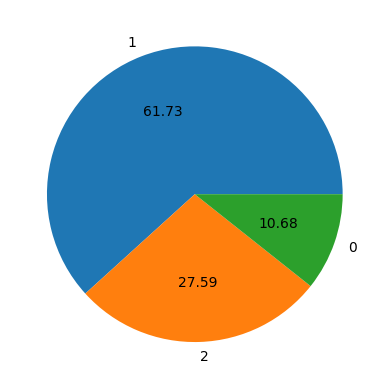

In [17]:
plt.pie(df['label'].value_counts(),labels=[1,2,0],autopct='%0.2f')
plt.show

#**Features**

In [18]:
import nltk

In [19]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [20]:
df['num_characters'] = df['text'].apply(len)

In [21]:
df.head()

,text,label,num_characters
0,pitchfork track review: taylor swift’s “actual...,0,83
1,taylor swift has regained the masters of her f...,2,62
2,pitchfork review: taylor swift - the life of a...,1,61
3,taylor swift announced engagement,1,33
4,taylor swift - the fate of ophelia (official m...,1,57


In [22]:
df['text'].apply(lambda x:nltk.word_tokenize(x))

,text
0,"[pitchfork, track, review, :, taylor, swift, ’..."
1,"[taylor, swift, has, regained, the, masters, o..."
2,"[pitchfork, review, :, taylor, swift, -, the, ..."
3,"[taylor, swift, announced, engagement]"
4,"[taylor, swift, -, the, fate, of, ophelia, (, ..."
...,...
31943,"[why, do, we, feel, like, pop, music, is, gett..."
31944,"[in, korea, do, they, call, kpop, just, regula..."
31945,"[are, there, less, hours, of, sunlight, in, am..."
31946,"[if, there, is, only, one, woman, for, every, ..."


In [23]:
df["num_words"]=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()


,text,label,num_characters,num_words
0,pitchfork track review: taylor swift’s “actual...,0,83,15
1,taylor swift has regained the masters of her f...,2,62,12
2,pitchfork review: taylor swift - the life of a...,1,61,14
3,taylor swift announced engagement,1,33,4
4,taylor swift - the fate of ophelia (official m...,1,57,12


In [25]:
df["num_sent"]=df["text"].apply(lambda x:len(nltk.sent_tokenize(x)) )

In [26]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,30842.000000,30842.000000,30842.000000
mean,96.906005,20.178588,1.460768
std,61.403954,13.414412,0.880769
min,1.000000,1.000000,1.000000
25%,53.000000,11.000000,1.000000
50%,79.000000,16.000000,1.000000
75%,122.000000,25.000000,2.000000
max,280.000000,80.000000,13.000000


In [27]:
#1=neutral
df[df['label']==0][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,3293.000000,3293.000000,3293.000000
mean,117.207713,24.385667,1.627391
std,66.111788,15.031156,1.044835
min,1.000000,1.000000,1.000000
25%,68.000000,13.000000,1.000000
50%,98.000000,20.000000,1.000000
75%,158.000000,33.000000,2.000000
max,280.000000,78.000000,10.000000


In [28]:
#2=positive
df[df['label']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,19039.000000,19039.000000,19039.000000
mean,86.386260,17.768265,1.318767
std,55.788177,11.997928,0.731978
min,1.000000,1.000000,1.000000
25%,49.000000,10.000000,1.000000
50%,71.000000,14.000000,1.000000
75%,104.000000,21.000000,1.000000
max,280.000000,80.000000,13.000000


In [29]:
#0=negative
df[df['label']==2][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,8510.000000,8510.000000,8510.000000
mean,112.585429,23.943126,1.713984
std,66.019450,14.446852,1.034704
min,1.000000,1.000000,1.000000
25%,64.000000,13.000000,1.000000
50%,96.000000,20.000000,1.000000
75%,152.000000,32.000000,2.000000
max,280.000000,76.000000,8.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

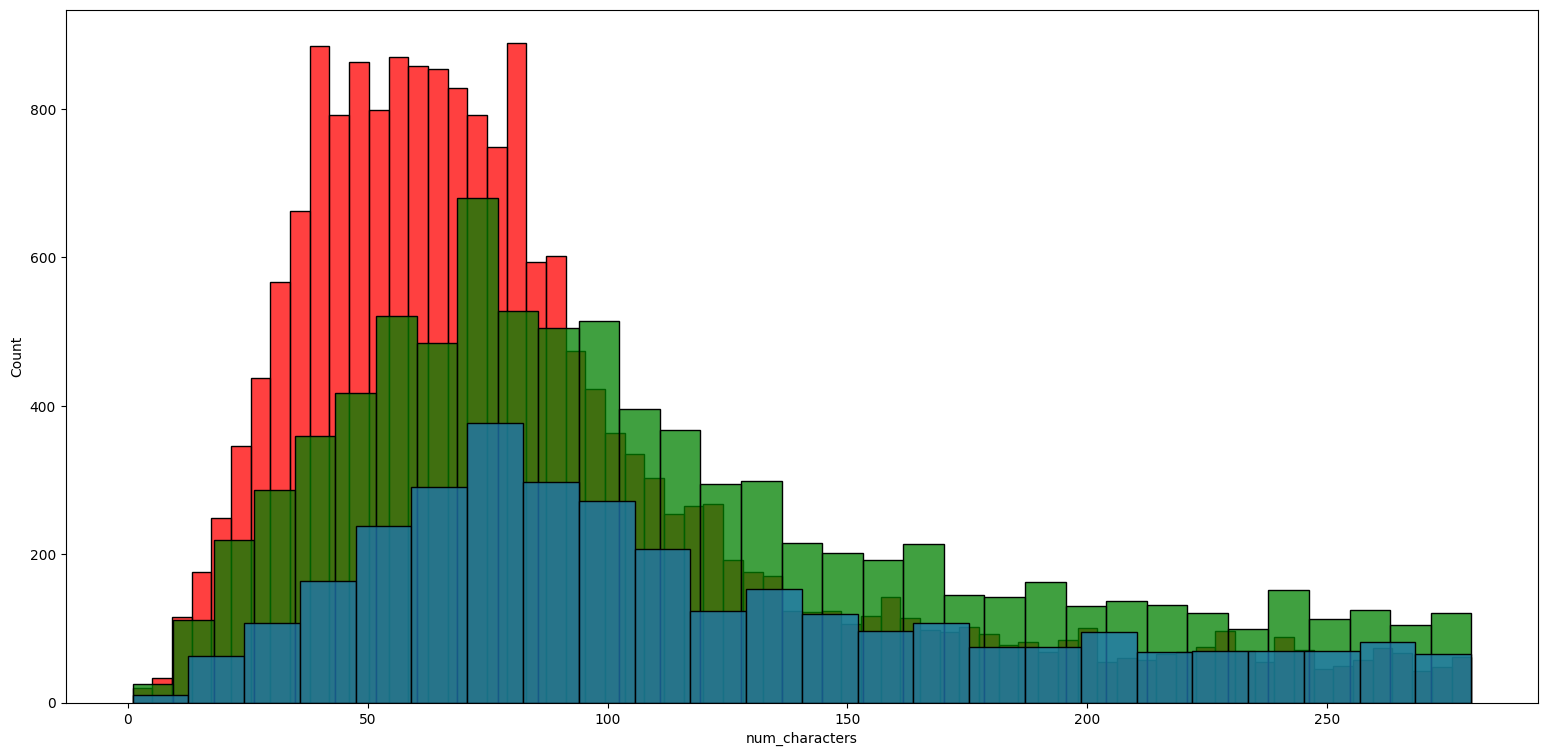

In [31]:
plt.figure(figsize=(19,9))
sns.histplot(df[df['label']==1]['num_characters'],color='red')
sns.histplot(df[df['label']==2]['num_characters'],color='green')
sns.histplot(df[df['label']==0]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

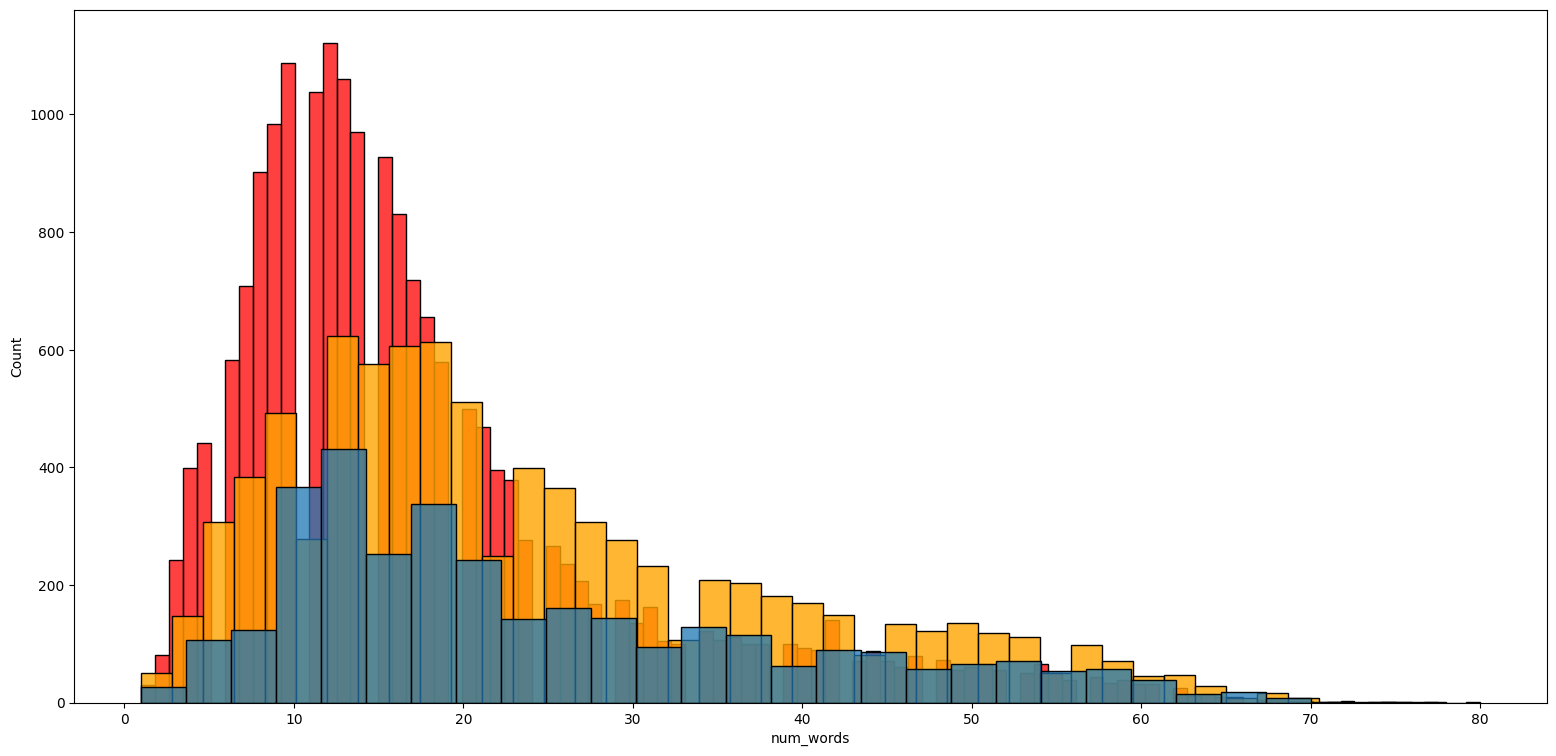

In [32]:
plt.figure(figsize=(19,9))
sns.histplot(df[df['label']==1]['num_words'],color='red')
sns.histplot(df[df['label']==2]['num_words'],color='orange',alpha=0.8)
sns.histplot(df[df['label']==0]['num_words'])

#**Balancing the data**

**negative=0,neutral=1,positive=2**

In [33]:
neutral=df[df['label']==1]

In [34]:
positive=df[df['label']==2]

In [35]:
negative=df[df['label']==0]

In [36]:
print("Neutral shape",neutral.shape)

Neutral shape (19039, 5)


In [37]:
print("Positive shape",positive.shape)

Positive shape (8510, 5)


In [38]:
print("Negative shape",negative.shape)

Negative shape (3293, 5)


In [39]:
neutral=neutral.sample(negative.shape[0])

In [40]:
neutral.shape

(3293, 5)

In [41]:
positive=positive.sample(negative.shape[0])

In [42]:
positive.shape

(3293, 5)

In [43]:
#Checking the shape of the data
neutral.shape,positive.shape,negative.shape

((3293, 5), (3293, 5), (3293, 5))

In [44]:
#append all three labels
data=pd.concat([neutral,positive,negative],ignore_index=True)

In [45]:
data.sample(10)

,text,label,num_characters,num_words,num_sent
2075,[fresh video] girl puppy - i just do!,1,37,11,1
8847,what is your opinion on taylor swift now? i do...,0,208,52,2
9350,"ryan adams continues social media crashout, ac...",0,243,43,1
2536,all of the girls (lover outtake) has been leak...,1,84,20,1
2245,american federation of musicians international...,1,238,22,1
4555,sharing pfps me and my best friend decided to ...,2,126,26,1
7898,"and with that, the b side is gone! it's sour e...",0,164,36,3
4223,"ozzy osbourne's isolated vocals from ""mama, i'...",2,154,29,1
2433,bradley keen - business [folk pop].,1,35,9,1
948,100 hits from march 1966: tracks taken from ac...,1,71,14,1


In [46]:
data.columns

Index(['text', 'label', 'num_characters', 'num_words', 'num_sent'], dtype='object')

#**Transforming the text**

In [47]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
from nltk.corpus import stopwords

In [49]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [50]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()

In [51]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [52]:
data['text'].apply(transform_text)

,text
0,white hous use taylor swift fate ophelia tikto...
1,look back pop cultur signific moment 2023
2,2007 american music award present
3,reno drive studio work lp2
4,particip 75k subscrib censu pleas
...,...
9874,lock go becom huge barrier futur pop music aff...
9875,actual rock song refer pop song music journali...
9876,peopl mean refer pop music hate everyon meet
9877,pop music fuck terribl ca put finger but annoy...


In [53]:
data['transformed_text']=data['text'].apply(transform_text)

In [54]:
data.head()

,text,label,num_characters,num_words,num_sent,transformed_text
0,white house uses taylor swift’s ‘the fate of o...,1,120,22,1,white hous use taylor swift fate ophelia tikto...
1,a look back on pop culture's most significant ...,1,61,12,1,look back pop cultur signific moment 2023
2,2007 american music awards presenters,1,37,5,1,2007 american music award present
3,reno drive are now in the studio working on lp2,1,47,10,1,reno drive studio work lp2
4,if you haven't participated in our 75k subscri...,1,80,15,1,particip 75k subscrib censu pleas


#Representing the data through WordCloud

In [55]:
from wordcloud import WordCloud

In [56]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [57]:
negative_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

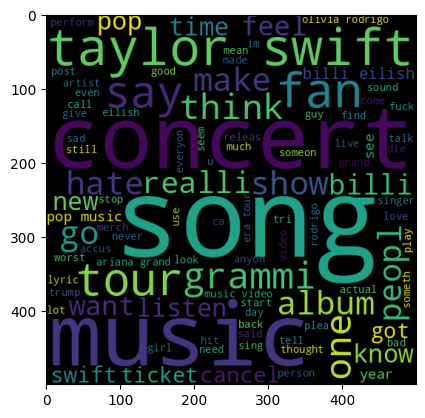

In [58]:
plt.imshow(negative_wc)

In [59]:
neutral_wc=wc.generate(data[data['label']==0]['transformed_text'].str.cat(sep=""))

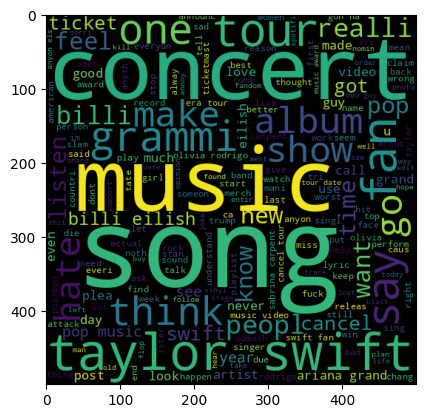

In [60]:
plt.imshow(neutral_wc)

In [61]:
positive_wc=wc.generate(data[data['label']==2]['transformed_text'].str.cat(sep=""))

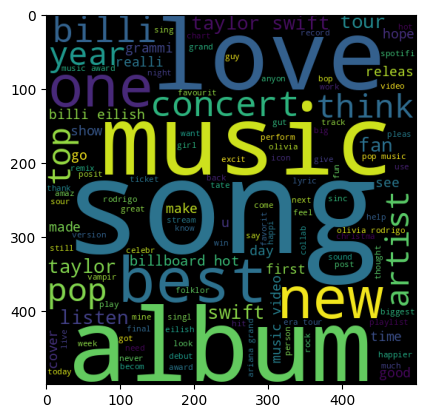

In [62]:
plt.imshow(positive_wc)

#**Visualisation on Balanced Data**

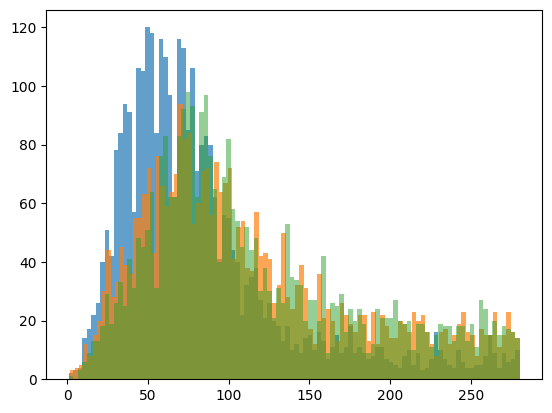

In [63]:
plt.hist(data[data['label']==1]['num_characters'],bins=100,alpha=0.7)
plt.hist(data[data['label']==2]['num_characters'],bins=100,alpha=0.7)
plt.hist(data[data['label']==0]['num_characters'],bins=100,alpha=0.5)
plt.show()

#**Spliting Data**

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train,x_test,y_train,y_test=train_test_split(data['transformed_text'],data['label'],test_size=0.3,random_state=0,shuffle=True)

In [66]:
x_train

,transformed_text
5304,best new music june curat playlist favorit new...
7636,shellback return produc 1989 taylor version ex...
5412,billi eilish explain power vulner
6535,favorit mine green day metallica taylor swift ...
1247,creat album cover posit vintag style
...,...
9225,sure tour end abruptli never got bunch gear re...
4859,made 2nd ever video essay made perfect movi so...
3264,taylor swift evermor sell million worldwid fir...
9845,make fun pop music like earli 2010 anymor


In [67]:
y_train

,label
5304,2
7636,0
5412,2
6535,2
1247,1
...,...
9225,0
4859,2
3264,1
9845,0


# **Building Model Pipeline Tf-idf (Random Forest)**



In [68]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf_classifier=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100))])

In [70]:
rf_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

#**Predicting the results (Random Forest)**

In [71]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [72]:
rf_pred=rf_classifier.predict(x_test)

In [73]:
#Confusion Matrix
confusion_matrix(y_test,rf_pred)

array([[714, 190, 110],
       [181, 653, 147],
       [129, 230, 610]])

In [74]:
#Accuracy Score
accuracy_score(y_test,rf_pred)

0.667004048582996

In [75]:
#Classification Report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      1014
           1       0.61      0.67      0.64       981
           2       0.70      0.63      0.66       969

    accuracy                           0.67      2964
   macro avg       0.67      0.67      0.67      2964
weighted avg       0.67      0.67      0.67      2964



In [76]:
# Predict a real message
rf_classifier.predict(["i like songs and taylor is average"])

array([0])

# Applying SVM model

In [77]:
from sklearn.svm import SVC

In [78]:
sv_model=SVC(gamma="auto")

In [79]:
sv_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', SVC(C=100,gamma='auto'))])

In [80]:
sv_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

#**Predicting models**

In [81]:
sv_pred=sv_classifier.predict(x_test)

In [82]:
#Confusion Matrix
confusion_matrix(y_test,sv_pred)

array([[176, 147, 691],
       [ 34, 292, 655],
       [ 10,  49, 910]])

In [83]:
#Accuracy Score
accuracy_score(y_test,sv_pred)

0.4649122807017544

In [84]:
#Classification Report
print(classification_report(y_test,sv_pred))

              precision    recall  f1-score   support

           0       0.80      0.17      0.29      1014
           1       0.60      0.30      0.40       981
           2       0.40      0.94      0.56       969

    accuracy                           0.46      2964
   macro avg       0.60      0.47      0.42      2964
weighted avg       0.60      0.46      0.41      2964



# **Applying Decision tree**

In [85]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
dt_model=DecisionTreeClassifier()

In [87]:
dt_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', DecisionTreeClassifier())])

In [88]:
dt_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', DecisionTreeClassifier())])

#**Predicting Models**

In [89]:
dt_pred=dt_classifier.predict(x_test)

In [90]:
#Confusion Matrix
confusion_matrix(y_test,dt_pred)

array([[609, 239, 166],
       [230, 557, 194],
       [155, 225, 589]])

In [91]:
#Accuracy Score
accuracy_score(y_test,dt_pred)

0.5921052631578947

#**Applying Naive Bayes**

In [92]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()

In [93]:
nv_classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier', MultinomialNB())])

In [94]:
nv_classifier.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('classifier', MultinomialNB())])

#Predicting Results|

In [95]:
nv_pred=nv_classifier.predict(x_test)

In [96]:
#Confusion Matrix
confusion_matrix(y_test,nv_pred)

array([[741,  97, 176],
       [192, 503, 286],
       [ 92, 156, 721]])

In [97]:
#Accuracy Score
accuracy_score(y_test,nv_pred)

0.6629554655870445

In [98]:
rf_classifier.predict(["love u so much"])

array([2])

In [99]:
print("Compairing Accuracy Score")
print("Random Forest",accuracy_score(y_test,rf_pred))
print("Decision tree",accuracy_score(y_test,dt_pred))
print("SVM",accuracy_score(y_test,sv_pred))
print("Naive Bayes",accuracy_score(y_test,nv_pred))

Compairing Accuracy Score
Random Forest 0.667004048582996
Decision tree 0.5921052631578947
SVM 0.4649122807017544
Naive Bayes 0.6629554655870445


In [100]:
def predict_sentiment(text):
    prediction = rf_classifier.predict([text])
    return prediction[0]

In [101]:
text_to_predict = input("minimum 10 words sentences:")
if text_to_predict.strip() == "":
    print("Please provide text in the input variable")
else:
    prediction_result = predict_sentiment(text_to_predict)
    print(f"The prediction for the provided text is: {prediction_result}")
    if prediction_result == 0:
        print("negative sentiments")
    elif prediction_result == 1:
        print("neutral sentiment")
    else:
      print("Positive sentiment")


minimum 10 words sentences:fffg
The prediction for the provided text is: 0
negative sentiments


Conclusion-

1.   By applying model i.e Random Forest,Decision tree,SVM,Naive Bayes
2.   It is observed that Random Forest gives the better accuracy score compare to other models.
3. Hence,accuracy score is 67%
4. It descibes the sentiments on the reviews of Taylor swift concerts.




In [104]:
import pickle

# Save model (the entire pipeline)
with open("model.pkl", "wb") as f:
    pickle.dump(rf_classifier, f)

# Save vectorizer (extract from the pipeline)
with open("vectorizer.pkl", "wb") as f:
    pickle.dump(rf_classifier.named_steps['tfidf'], f)
